<h2><b>Score analyzing and developing model to predict the math scores.</b></h2>

<h4><b>Objective: </b></h4>

The objective of this project is to analyzing the dataset and to predict the math scores based on the dataset.

<h4><b>Dataset: </b></h4>

The dataset used is data that contains information on physics, science, statistics, and mathematics scores.

<h4><b>Web Deployment: </b></h4>

https://huggingface.co/spaces/AnandaKhairurriza/math-score-prediction

## Import Libraries
This section contains list of libraries that used on this project

In [1]:
import numpy as np

# For processing tabular data
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting between train and test set
from sklearn.model_selection import train_test_split

# For scaling the feature
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Algorithm used for model prediction
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Metrics used for model performance
from sklearn.metrics import mean_absolute_error, r2_score

# Spearman correlation
from scipy.stats import spearmanr

# For saving the model
import pickle
import json

The python and library version used in this project are:
<ul>
    <li>Python version <b>3.11.0</b></li>
    <li>Numpy version <b>1.23.5</b></li>
    <li>Pandas version <b>1.5.2</b></li>
    <li>SciPy version <b>1.9.3</b></li>
    <li>Feature-engine version <b>1.5.2</b></li>
    <li>Scikit-Learn version <b>1.2.0</b></li>
    <li>Seaborn version <b>0.12.1</b></li>
</ul>

## Data Preprocessing
This section contains the steps for preparing the data such as loading the dataset, checking dataset information, and data cleansing if necessary.

In [2]:
# Load data csv
df = pd.read_csv("Data.csv")

In [3]:
# Show first 10 data
df.head(10)

,Pysics,Science,Statistics,Math
0,64,67,69,68
1,74,74,63,67
2,60,59,55,57
3,84,88,89,91
4,80,88,78,82
5,75,68,68,63
6,66,59,55,65
7,77,71,66,73
8,70,71,60,67
9,89,84,80,85


In [4]:
# Show last 10 data
df.tail(10)

,Pysics,Science,Statistics,Math
456,89,75,73,57
457,83,65,67,91
458,74,91,85,82
459,74,60,82,63
460,69,65,67,65
461,75,91,57,73
462,85,74,74,67
463,65,65,83,85
464,76,91,71,82
465,74,68,85,67


In [5]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pysics      466 non-null    int64
 1   Science     466 non-null    int64
 2   Statistics  466 non-null    int64
 3   Math        466 non-null    int64
dtypes: int64(4)
memory usage: 14.7 KB


Based on information, the dataset has 4 integer columns (Pysics, Science, Statistics, Math) and has 466 data. Beside that, there is no empty data in the dataset (can be seen on 466 non-null from total 466 entries).

In [6]:
# Checking numeric columns information in dataset
df.describe()

,Pysics,Science,Statistics,Math
count,466.000000,466.000000,466.000000,466.000000
mean,71.742489,72.813305,73.682403,74.540773
std,16.033238,14.270110,12.180806,11.424528
min,0.000000,0.000000,22.000000,22.000000
25%,66.000000,66.000000,66.250000,67.000000
50%,74.000000,74.000000,74.000000,74.000000
75%,82.000000,83.000000,83.000000,83.000000
max,99.000000,99.000000,100.000000,99.000000


Based on numeric column information, we can see the mean/average score of all subjects is more than 70 from 466 people who take the exam. We can say that most of have a good score on the test (I set a score threshold at 70). The range (minimal to maximal) of Physics and Science score test is 0 to 99, the range of Statistics score test is 22 to 100, and range of Math score test is 22 to 99. From there, we can assume the scoring range starts from 0 until 100.

The next step is renaming the dataset column. The "Pysics" name seems typo so I rename it to "Physics". And the "Statistics" name is too long so I change it to just "Stats".

In [7]:
# Renaming the column
df.rename(columns={"Pysics":"Physics"}, inplace=True)
df.rename(columns={"Statistics":"Stats"}, inplace=True)
df

,Physics,Science,Stats,Math
0,64,67,69,68
1,74,74,63,67
2,60,59,55,57
3,84,88,89,91
4,80,88,78,82
...,...,...,...,...
461,75,91,57,73
462,85,74,74,67
463,65,65,83,85
464,76,91,71,82


After fixing the column, the next step is to clean the dataset from duplicated data.

In [8]:
# Check duplicate data
check = df.duplicated()
check.value_counts()

False    465
True       1
dtype: int64

After checking the amount of duplicate data, there's one duplicate data. Let's see the duplicated data more detail.

In [9]:
duplicate = df[df.duplicated(keep = False)]
duplicate

,Physics,Science,Stats,Math
398,60,71,83,82
446,60,71,83,82


It seems that the data with ID 398 has same value with ID 446. In this case, we will delete the 446 one.

In [10]:
# Deleting duplicate data
df.drop(index=[446], inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
# Check duplicate data again
check = df.duplicated()
check.value_counts()

False    465
dtype: int64

## Exploratory Data Analysis (EDA)
In this section, an analysis of the dataset is carried out to obtain insight and detailed information about the dataset.

### Show the score frequency

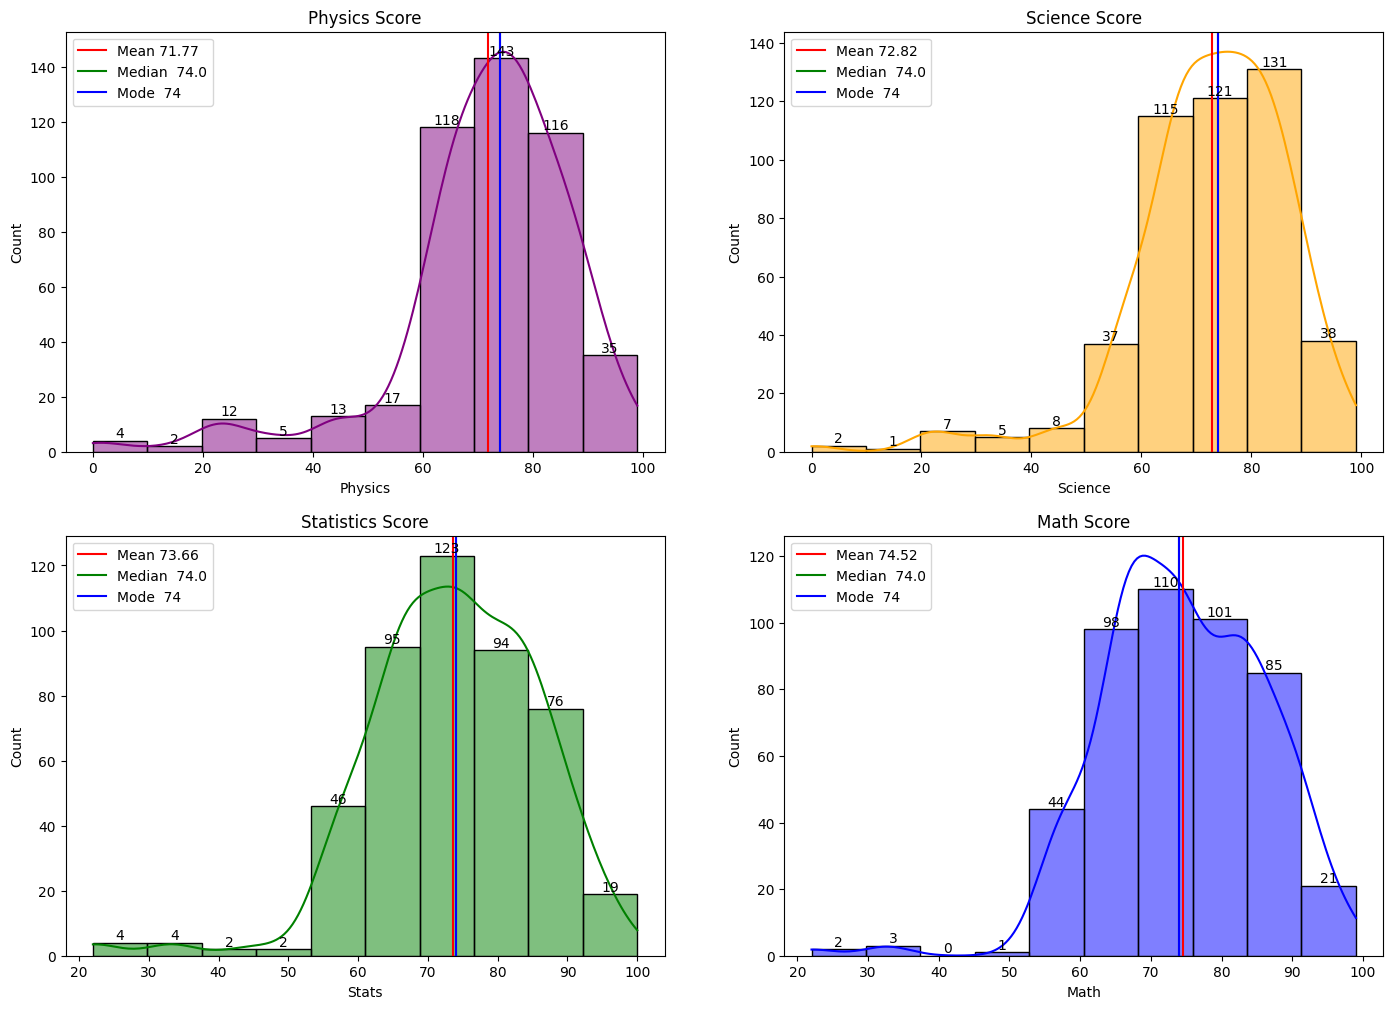

In [12]:
plt.figure(figsize=(17, 12))
PhysicsMean = "Mean " + str(np.round(df.Physics.mean(),2))
PhysicsMed = "Median  " + str(df.Physics.median())
PhysicsMode = "Mode  " + str(df.Physics.mode()[0])

ScienceMean = "Mean " + str(np.round(df.Science.mean(),2))
ScienceMed = "Median  " + str(df.Science.median())
ScienceMode = "Mode  " + str(df.Science.mode()[0])

StatsMean = "Mean " + str(np.round(df.Stats.mean(),2))
StatsMed = "Median  " + str(df.Stats.median())
StatsMode = "Mode  " + str(df.Stats.mode()[0])

MathMean = "Mean " + str(np.round(df.Math.mean(),2))
MathMed = "Median  " + str(df.Math.median())
MathMode = "Mode  " + str(df.Math.mode()[0])

# Physics Histogram
plt.subplot(2, 2, 1)
plt.title("Physics Score")
hP = sns.histplot(data=df, x=df.Physics, bins=10, kde=True, color="purple")
hP.bar_label(hP.containers[0])
plt.axvline(x=df.Physics.mean(),color="red", lw=1.5, label=PhysicsMean)
plt.axvline(x=df.Physics.median(), color="green", lw=1.5, label=PhysicsMed)
plt.axvline(x=df.Physics.mode()[0], color="blue", lw=1.5, label=PhysicsMode)
plt.legend(loc="upper left")

# Science Histogram
plt.subplot(2, 2, 2)
plt.title("Science Score")
hS = sns.histplot(data=df, x=df.Science, bins=10, kde=True, color="orange")
hS.bar_label(hS.containers[0])
plt.axvline(x=df.Science.mean(),color="red", lw=1.5, label=ScienceMean)
plt.axvline(x=df.Science.median(), color="green", lw=1.5, label=ScienceMed)
plt.axvline(x=df.Science.mode()[0], color="blue", lw=1.5, label=ScienceMode)
plt.legend(loc="upper left")

# Statistics Histogram
plt.subplot(2, 2, 3)
plt.title("Statistics Score")
hT = sns.histplot(data=df, x=df.Stats, bins=10, kde=True, color="green")
hT.bar_label(hT.containers[0])
plt.axvline(x=df.Stats.mean(),color="red", lw=1.5, label=StatsMean)
plt.axvline(x=df.Stats.median(), color="green", lw=1.5, label=StatsMed)
plt.axvline(x=df.Stats.mode()[0], color="blue", lw=1.5, label=StatsMode)
plt.legend(loc="upper left")

# Math Histogram
plt.subplot(2, 2, 4)
plt.title("Math Score")
hM = sns.histplot(data=df, x=df.Math, bins=10, kde=True, color="blue")
hM.bar_label(hM.containers[0])
plt.axvline(x=df.Math.mean(),color="red", lw=1.5, label=MathMean)
plt.axvline(x=df.Math.median(), color="green", lw=1.5, label=MathMed)
plt.axvline(x=df.Math.mode()[0], color="blue", lw=1.5, label=MathMode)
plt.legend(loc="upper left")

plt.show()

Based on the histogram of all subjects score test, there's several information can be found:
<ul>
    <li>The physics average (mean) score is 71.77, the middle score (median) is 74, and most (mode) people got a 74 score on the exam. The physics scores data seems not normally distributed, we can see mostly the data in the right side (negative/left skew). That means most people got a good score (70 or above) rather than a bad score (under 70)</li>
    <br>
    <li>The science average (mean) score is 72.82, the middle score (median) is 74, and most (mode) people got a 74 score on the exam. The science scores data seems not normally distributed, we can see mostly the data in the right side (negative/left skew). That means most people got a good score (70 or above) rather than a bad score (under 70)</li>
    <br>
    <li>The statistics average (mean) score is 73.66, the middle score (median) is 74, and most (mode) people got a 74 score on the exam. The statistics scores data seems not normally distributed, we can see mostly the data in the right side (negative/left skew). That means most people got a good score (70 or above) rather than a bad score (under 70)</li>
    <br>
    <li>The math average (mean) score is 74.52, the middle score (median) is 74, and most (mode) people got a 74 score on the exam. The math scores data seems not normally distributed, we can see mostly the data in the right side (negative/left skew). That means most people got a good score (70 or above) rather than a bad score (under 70)</li>
</ul>

All the subjects scores data is not normally distributed (negative/left skew) because most of the data is on the right. The middle score (median) and most score (mode) of all subjects has the same value too (74).

### Math score comparison

The next is to find out how many people who got the good and bad score on the math exam (for the threshold score, I set it at 70).

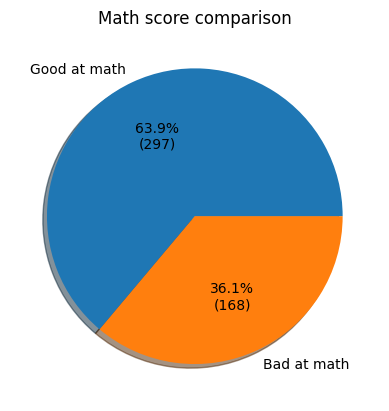

In [13]:
data = [df[df["Math"] >= 70].shape[0], df[df["Math"] < 70].shape[0]]
labels = ["Good at math", "Bad at math"]

def fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, len(df)*x/100)

plt.title("Math score comparison")
plt.pie(data, labels=labels, shadow = True, autopct=fmt)
plt.show()

Based on pie chart above, we can see most of the people got a good score on the math exam (63.9%) than bad score (36.1%). The next is step is to see more detail information about these comparison.

### Score comparison with good at math

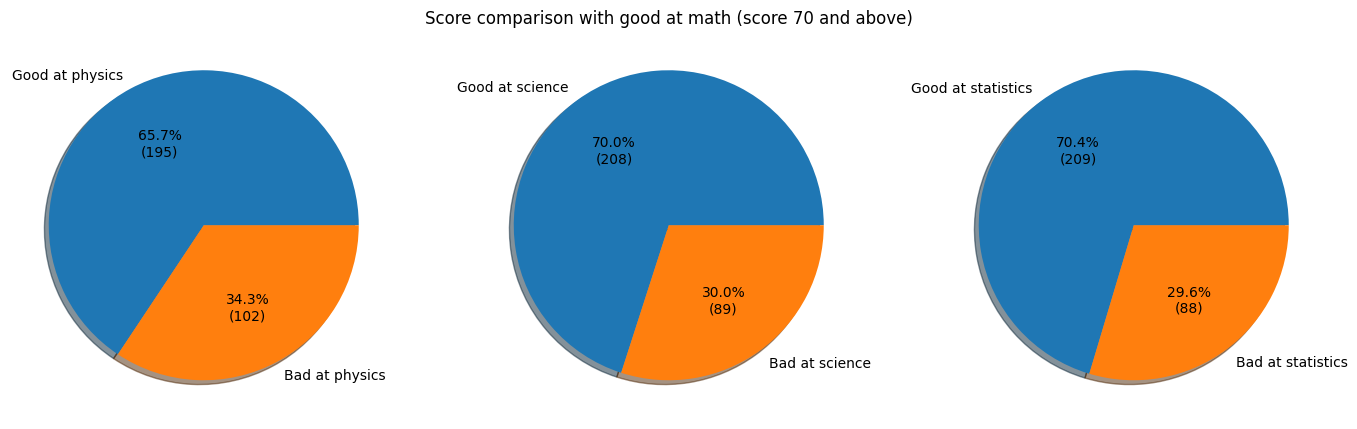

In [14]:
def fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, len(df[df["Math"] >= 70])*x/100)

plt.figure(figsize=(17, 8))

plt.subplot(1, 3, 1)
data = [df[(df["Math"] >= 70) & (df["Physics"] >= 70)].shape[0], df[(df["Math"] >= 70) & (df["Physics"] < 70)].shape[0]]
labels = ["Good at physics", "Bad at physics"]
plt.pie(data, labels=labels, shadow = True, autopct=fmt)

plt.subplot(1, 3, 2)
data = [df[(df["Math"] >= 70) & (df["Science"] >= 70)].shape[0], df[(df["Math"] >= 70) & (df["Science"] < 70)].shape[0]]
labels = ["Good at science", "Bad at science"]
plt.pie(data, labels=labels, shadow = True, autopct=fmt)

plt.title("Score comparison with good at math (score 70 and above)")

plt.subplot(1, 3, 3)
data = [df[(df["Math"] >= 70) & (df["Stats"] >= 70)].shape[0], df[(df["Math"] >= 70) & (df["Stats"] < 70)].shape[0]]
labels = ["Good at statistics", "Bad at statistics"]
plt.pie(data, labels=labels, shadow = True, autopct=fmt)

plt.show()

For people who got the good score on the math exam, there's several information we can get:
<ul>
    <li>For physics scores, the number of people who got the good score on the exam is 195 people (65.7%) and 102 people (34.3%) is got the bad score at the exam.</li>
    <li>For science scores, the number of people who got the good score on the exam is 208 people (70%) and 89 people (30%) is got the bad score at the exam.</li>
    <li>For statistics scores, the number of people who got the good score on the exam is 209 people (70.4%) and 88 people (29.6%) is got the bad score at the exam.</li>
</ul>

We can conclude that if someone get the good score on the math exam then most likely they have good score at physics, science, or statistics too. The next step is to see details about the people who got the bad score on the math exam.

### Score comparison with bad at math

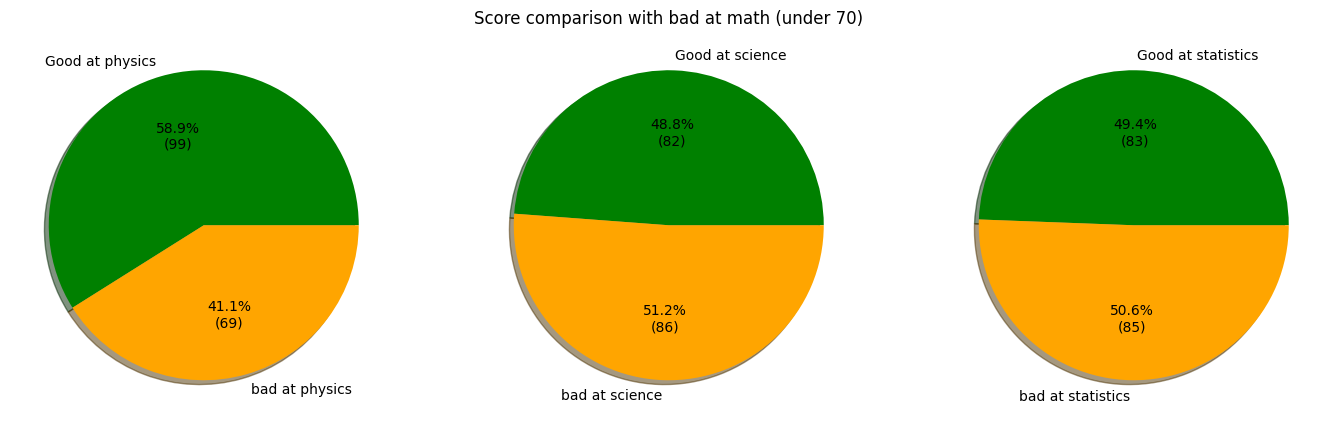

In [15]:
def fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, len(df[df["Math"] < 70])*x/100)

plt.figure(figsize=(17, 8))

plt.subplot(1, 3, 1)
data = [df[(df["Math"] < 70) & (df["Physics"] >= 70)].shape[0], df[(df["Math"] < 70) & (df["Physics"] < 70)].shape[0]]
labels = ["Good at physics", "bad at physics"]
plt.pie(data, labels=labels, shadow = True, autopct=fmt, colors=["green", "orange"])

plt.subplot(1, 3, 2)
data = [df[(df["Math"] < 70) & (df["Science"] >= 70)].shape[0], df[(df["Math"] < 70) & (df["Science"] < 70)].shape[0]]
labels = ["Good at science", "bad at science"]
plt.pie(data, labels=labels, shadow = True, autopct=fmt, colors=["green", "orange"])

plt.title("Score comparison with bad at math (under 70)")

plt.subplot(1, 3, 3)
data = [df[(df["Math"] < 70) & (df["Stats"] >= 70)].shape[0], df[(df["Math"] < 70) & (df["Stats"] < 70)].shape[0]]
labels = ["Good at statistics", "bad at statistics"]
plt.pie(data, labels=labels, shadow = True, autopct=fmt, colors=["green", "orange"])

plt.show()

For people who got the bad score on the math exam, there's several information we can get:
<ul>
    <li>For physics scores, the number of people who got the good score on the exam is 99 people (58.9%) and 69 people (41.1%) is got the bad score at the exam.</li>
    <li>For science scores, the number of people who got the good score on the exam is 82 people (48.8%) and 86 people (51.2%) is got the bad score at the exam.</li>
    <li>For statistics scores, the number of people who got the good score on the exam is 83 people (49.4%) and 85 people (50.6%) is got the bad score at the exam.</li>
</ul>

It seems that the science and statistics score have slightly correlation with the math score. Because if people got the bad score on the math exam then there's slightly more chance that he/she got the bad score at science or statistics too. Then like the conclusion we state before, if someone get the good score on the math exam then most likely they have good score at science, or statistics too.

## Feature Engineering
This section contains the process of initializing and preparing the feature and target for model training. The steps contain splitting the train-test set and other necessary steps such as handling missing values, handling outliers, feature selection, scaling, encoding, and so on.

Because we want to predict the math score based on Physics, Science, and Statistics score. We initialize the Physics, Science, and Stats columns as feature (X) and the Math column as target (y).

In [16]:
# Initializing feature and target
X = df.drop("Math", axis=1)
y = df["Math"]

After that, we need to determine the amount of train data and test data. In general, the training set must be larger than test set because it is used to train the model. The more data in train set, the model performance will better. For this project, I set the train set size is 80% of the total dataset and 20% for test set.

### Train test split

In [17]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=17)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (372, 3)
Test size: (93, 3)


From the output, we can see the train size is 325 data and test size is 140 data.

### Handling Outliers

At this step, the outliers data (data that have extreme or unusual values) in the dataset will be checked and handled. First, we need to check the train set distribution to choose the method for detecting outliers data.

In [18]:
# Check the data distribution
col = X_train.columns.to_list()
for c in col:
    if ((X_train[c].skew() <= 0.5) and (X_train[c].skew() >= -0.5)):
        print(c,"Skew :",X_train[c].skew(), "(Normal Distribution)")
    else:
        print(c,"Skew :",X_train[c].skew(), "(Skew Distribution)")

Physics Skew : -1.671266388249308 (Skew Distribution)
Science Skew : -1.1236090258487361 (Skew Distribution)
Stats Skew : -0.8235275432326731 (Skew Distribution)


As we can see, all the features are skew distributed. The best method for detecting outliers in skew distributed data is using the IQR method.

In [19]:
# Detect outlier in skew distribution
for c in col:
    IQR = X_train[c].quantile(0.75) - X_train[c].quantile(0.25)
    upper_boundary = X_train[c].quantile(0.75) + (1.5 * IQR)
    lower_boundary = X_train[c].quantile(0.25) - (1.5 * IQR)
    print(c)
    print("Upper boundary : ", upper_boundary)
    print("Lower boundary : ", lower_boundary)
    print("Outlier above upper boundary : {}".format(len(X_train[X_train[c] > upper_boundary])))
    print("Outlier below lower boundary : {}".format(len(X_train[X_train[c] < lower_boundary])))
    print("Value max : ", X_train[c].max())
    print("Value min : ", X_train[c].min())
    print("\n")

Physics
Upper boundary :  106.0
Lower boundary :  42.0
Outlier above upper boundary : 0
Outlier below lower boundary : 16
Value max :  99
Value min :  0


Science
Upper boundary :  108.5
Lower boundary :  40.5
Outlier above upper boundary : 0
Outlier below lower boundary : 8
Value max :  99
Value min :  1


Stats
Upper boundary :  106.625
Lower boundary :  41.625
Outlier above upper boundary : 0
Outlier below lower boundary : 6
Value max :  100
Value min :  22




From the outliers detection result, all outliers values in train set are below the lower boundary. For the Physics feature, there are 16 outliers data with the most extreme value is 0. For the Science feature, there are 8 outliers with the most extreme value is 1. And for the Stats feature, there are 6 outliers with the most extreme value is 22. These outliers will be ignored and will be included in the training model. Although the value is unusual, it is still possible that someone get that score on the test (maybe he/she didn't attend the test or any other reason so the score is 0) and not belong to an input error.

### Feature selection
At this step, we need to select the feature for model training. The method used in this step is checking the correlation between each feature with the target using pearson correlation because this method is robust to outliers. For p-value, I set the threshold at 0.05.

In [20]:
# Checking feature correlation with target
f_stat1, p_val1 = spearmanr(X_train.Physics, y_train)
f_stat2, p_val2 = spearmanr(X_train.Science, y_train)
f_stat3, p_val3 = spearmanr(X_train.Stats, y_train)

print("Physics P-Value :", p_val1)
print("Science P-Value :", p_val2)
print("Stats P-Value :", p_val3)

Physics P-Value : 0.011701703021377284
Science P-Value : 4.9105659870437336e-05
Stats P-Value : 2.743744096615544e-10


Based on the output result, all the p-value score is below the threshold (0.05). That means all feature values have correlation with the target and the target value is dependent on all feature values. So, all the feature will be included in model training.

### Feature Scaling
Feature scaling is a method to change the value of the features into the same scale. First, we need to check the distribution of each feature in train set.

In [21]:
# Check the data distribution
col = X_train.columns.to_list()
for c in col:
    if ((X_train[c].skew() <= 0.5) and (X_train[c].skew() >= -0.5)):
        print(c,"Skew :",X_train[c].skew(), "(Normal Distribution)")
    else:
        print(c,"Skew :",X_train[c].skew(), "(Skew Distribution)")

Physics Skew : -1.671266388249308 (Skew Distribution)
Science Skew : -1.1236090258487361 (Skew Distribution)
Stats Skew : -0.8235275432326731 (Skew Distribution)


The Physics and Science feature seems extremely skew (less than -1.0), and Stats feature just skew (less than -0.5 but no less than -1.0). The best scaler for extremely skew data is using Robust Scaler, and for just skew is Min Max Scaler.

In [22]:
# Scaling with Robust Scaler
scaler_1 = RobustScaler()
scaler_1.fit(X_train[["Physics", "Science"]])

X_train_scaled_1 = scaler_1.transform(X_train[["Physics", "Science"]])
X_test_scaled_1 = scaler_1.transform(X_test[["Physics", "Science"]])

In [23]:
# Scaling with Min Max
scaler_2 = MinMaxScaler()
scaler_2.fit(X_train[["Stats"]])

X_train_scaled_2 = scaler_2.transform(X_train[["Stats"]])
X_test_scaled_2 = scaler_2.transform(X_test[["Stats"]])

In [24]:
# Finalize feature
X_train_final = np.concatenate([X_train_scaled_1, X_train_scaled_2], axis=1)
X_test_final = np.concatenate([X_test_scaled_1, X_test_scaled_2], axis=1)

X_train_final

array([[ 1.0625    , -0.47058824,  0.80769231],
       [-0.875     , -0.35294118,  0.42307692],
       [-0.1875    , -0.52941176,  0.83333333],
       ...,
       [-1.1875    , -0.05882353,  0.6025641 ],
       [ 0.75      , -0.88235294,  0.94871795],
       [-2.5625    ,  1.29411765,  0.98717949]])

## Model Definition

There are several machine learning alghorithm will be used for testing the model performance, Linear Regression, SVM, KNN, Decision Tree, Random Forest, and Ada Boost. These alghorithm will be tested and evaluate the performance. The algorithm with the best performance will be chosen as the base algorithm for predicting the math scores.

In [25]:
# Defining the model
model_lr = LinearRegression()
model_svm = SVR()
model_knn = KNeighborsRegressor()
model_dt = DecisionTreeRegressor(random_state=17)
model_rf = RandomForestRegressor(random_state=17)
model_ab = AdaBoostRegressor(random_state=17)

## Model Training

After defining the model, all model will be trained with scaled train feature and train target.

In [26]:
model_lr.fit(X_train_final, y_train)

LinearRegression()

In [27]:
model_svm.fit(X_train_final, y_train)

SVR()

In [28]:
model_knn.fit(X_train_final, y_train)

KNeighborsRegressor()

In [29]:
model_dt.fit(X_train_final, y_train)

DecisionTreeRegressor(random_state=17)

In [30]:
model_rf.fit(X_train_final, y_train)

RandomForestRegressor(random_state=17)

In [31]:
model_ab.fit(X_train_final, y_train)

AdaBoostRegressor(random_state=17)

## Model Evaluation
In this section, the model performance need to be evaluated after being trained and predicted the target. The metrics used for evaluating the model are Mean Absolute Error (average of the amount error generated by model) and R2 Score (metrics to measure the variance of the data). The characteristic of good performance shown by mean absolute error value is 0 or nearly 0, and r2 score value is 1 or nearly 1.

In [32]:
# Predict Linear Regression
y_pred_train_lr = model_lr.predict(X_train_final)
y_pred_test_lr = model_lr.predict(X_test_final)

# Predict SVM
y_pred_train_svm = model_svm.predict(X_train_final)
y_pred_test_svm = model_svm.predict(X_test_final)

# Predict KNN
y_pred_train_knn = model_knn.predict(X_train_final)
y_pred_test_knn = model_knn.predict(X_test_final)

# Predict Decision Tree
y_pred_train_dt = model_dt.predict(X_train_final)
y_pred_test_dt = model_dt.predict(X_test_final)

# Predict Random Forest
y_pred_train_rf = model_rf.predict(X_train_final)
y_pred_test_rf = model_rf.predict(X_test_final)

# Predict Ada Boost
y_pred_train_ab = model_ab.predict(X_train_final)
y_pred_test_ab = model_ab.predict(X_test_final)

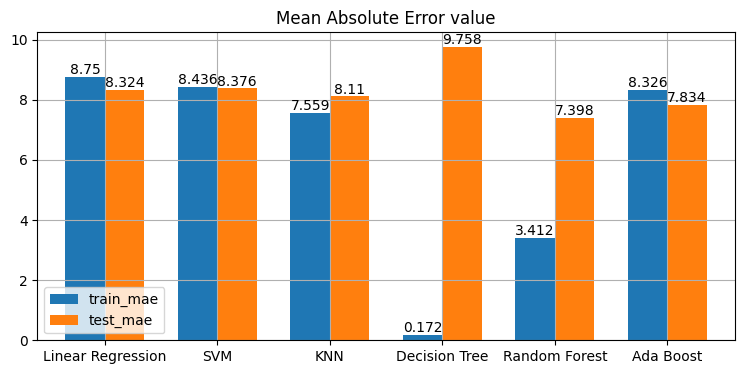

In [33]:
# Show mean absolute error value of each algorithm
train_pred_list = [y_pred_train_lr, y_pred_train_svm, y_pred_train_knn, y_pred_train_dt, y_pred_train_rf, y_pred_train_ab]
test_pred_list = [y_pred_test_lr, y_pred_test_svm, y_pred_test_knn, y_pred_test_dt, y_pred_test_rf, y_pred_test_ab]
model_name_list = ["Linear Regression", "SVM", "KNN", "Decision Tree", "Random Forest", "Ada Boost"]
mae_train = []
mae_test = []

for x, y in zip(train_pred_list, test_pred_list):
    mae_train.append(np.round(mean_absolute_error(y_train, x),3))
    mae_test.append(np.round(mean_absolute_error(y_test, y),3))

data = {
    "train_mae" : mae_train,
    "test_mae" : mae_test
}

# Plot bar chart
df_cmp = pd.DataFrame(data=data, index=model_name_list)
chart = df_cmp.plot(kind="bar", grid=True, figsize=(9,4), width=0.7)
plt.xticks(rotation="horizontal")
plt.legend(loc="lower left")
plt.title("Mean Absolute Error value")
for i in chart.containers:
    chart.bar_label(i,)

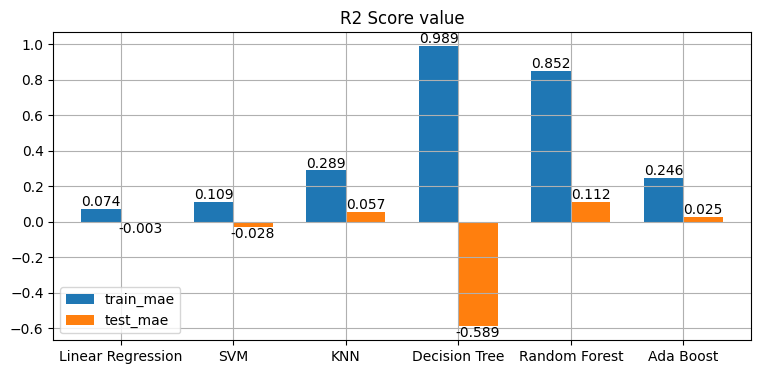

In [34]:
# Show r2 score value of each algorithm
train_pred_list = [y_pred_train_lr, y_pred_train_svm, y_pred_train_knn, y_pred_train_dt, y_pred_train_rf, y_pred_train_ab]
test_pred_list = [y_pred_test_lr, y_pred_test_svm, y_pred_test_knn, y_pred_test_dt, y_pred_test_rf, y_pred_test_ab]
model_name_list = ["Linear Regression", "SVM", "KNN", "Decision Tree", "Random Forest", "Ada Boost"]
r2_train = []
r2_test = []

for x, y in zip(train_pred_list, test_pred_list):
    r2_train.append(np.round(r2_score(y_train, x),3))
    r2_test.append(np.round(r2_score(y_test, y),3))

data = {
    "train_mae" : r2_train,
    "test_mae" : r2_test
}

# Plot bar chart
df_cmp = pd.DataFrame(data=data, index=model_name_list)
chart = df_cmp.plot(kind="bar", grid=True, figsize=(9,4), width=0.7)
plt.xticks(rotation="horizontal")
plt.legend(loc="lower left")
plt.title("R2 Score value")
for i in chart.containers:
    chart.bar_label(i,)

It seems all the algorithm performance results still underfit or overfit. We can see the Linear Regression, SVM, KNN, and Ada Boost is underfit because both in the train set and test set the Mean Absolute Error is high, and the R2 Score is very low (even reaching a negative value). For Decision tree is extremely overfitting because in the train set the Mean Absolute Error value is low but in the test set is high, and the R2 Score in the train set is high but in the test set is very low (even reaching a negative value). Random Forest is overfitting too but not extreme as Decision Tree. From all algorithms, the least better performance is Random Forest. The next step is to tune Random Forest algorithm, so the performance can be improved.

## Model Tuning

For tuning the model, we need to find the best parameter for random forest algorithm. To find the best parameter, here I using the Manual Search method by using these parameters.

In [35]:
model_tune = RandomForestRegressor(random_state=17, n_estimators=1300, max_features="sqrt", criterion="squared_error", max_depth=100, bootstrap=True)

model_tune.fit(X_train_final, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=1300,
                      random_state=17)

In [36]:
# Predict using tuned model
y_pred_train_tune = np.round(model_tune.predict(X_train_final),2)
y_pred_test_tune = np.round(model_tune.predict(X_test_final),2)

In [37]:
# MAE comparison between before and after tuned
d = {
    "Model name" : ["Random Forest (default)", "Random Forest (tuning)"],
    "Train (MAE)" : [np.round(mean_absolute_error(y_train, y_pred_train_rf),3), np.round(mean_absolute_error(y_train, y_pred_train_tune),3)],
    "Test (MAE)" : [np.round(mean_absolute_error(y_test, y_pred_test_rf),3), np.round(mean_absolute_error(y_test, y_pred_test_tune),3)],
}

df_cmp = pd.DataFrame(data=d)
df_cmp.style.hide_index()

C:\Users\user\AppData\Local\Temp\ipykernel_22272\1342121641.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_cmp.style.hide_index()


Model name,Train (MAE),Test (MAE)
Random Forest (default),3.412000,7.398000
Random Forest (tuning),3.295000,7.346000


In [38]:
# R2 Score between before and after tuned
d = {
    "Model name" : ["Random Forest (default)", "Random Forest (tuning)"],
    "Train (R2 Score)" : [np.round(r2_score(y_train, y_pred_train_rf),3), np.round(r2_score(y_train, y_pred_train_tune),3)],
    "Test (R2 Score)" : [np.round(r2_score(y_test, y_pred_test_rf),3), np.round(r2_score(y_test, y_pred_test_tune),3)],
}

df_cmp = pd.DataFrame(data=d)
df_cmp.style.hide_index()

C:\Users\user\AppData\Local\Temp\ipykernel_22272\2649286048.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_cmp.style.hide_index()


Model name,Train (R2 Score),Test (R2 Score)
Random Forest (default),0.852000,0.112000
Random Forest (tuning),0.864000,0.125000


After tuning the model, the performance is slightly increased/more better than before but it still overfit. Let's analyze the model prediction result in the test set.

In [39]:
# Comparison dataframe
df_pred = pd.DataFrame(y_pred_test_tune, columns=["pred"], index=y_test.index)
pred_test_cmp = pd.concat([X_test, y_test, df_pred], axis=1)
pred_test_cmp["error"] = abs(pred_test_cmp["Math"] - pred_test_cmp["pred"])
pred_test_cmp

,Physics,Science,Stats,Math,pred,error
287,66,76,74,67,71.34,4.34
109,23,69,62,56,76.74,20.74
235,44,63,86,81,76.17,4.83
105,44,93,48,85,78.46,6.54
359,70,75,63,74,68.98,5.02
...,...,...,...,...,...,...
258,68,81,81,64,77.24,13.24
122,33,80,74,80,78.64,1.36
272,71,66,60,66,65.53,0.47
412,57,85,82,87,81.00,6.00


In [40]:
# Check the small error prediction (error less than 5)
pred_test_cmp[pred_test_cmp["error"] < 5]

,Physics,Science,Stats,Math,pred,error
287,66,76,74,67,71.34,4.34
235,44,63,86,81,76.17,4.83
154,80,74,89,80,77.59,2.41
350,89,88,91,82,85.16,3.16
144,46,78,74,76,77.10,1.10
53,88,86,95,86,84.96,1.04
440,65,74,67,73,71.48,1.52
327,77,86,76,74,72.45,1.55
254,74,75,84,66,61.84,4.16
161,93,85,80,68,72.32,4.32


In [41]:
# Check the high error prediction (error more than 5)
pred_test_cmp[pred_test_cmp["error"] >= 5]

,Physics,Science,Stats,Math,pred,error
109,23,69,62,56,76.74,20.74
105,44,93,48,85,78.46,6.54
359,70,75,63,74,68.98,5.02
35,68,66,62,61,68.53,7.53
349,79,60,65,91,74.12,16.88
132,28,56,94,70,78.24,8.24
223,4,69,83,65,79.26,14.26
345,84,83,76,91,77.87,13.13
397,82,87,74,91,76.71,14.29
151,44,22,94,74,80.58,6.58


The model is good to predict when actual math score is around 60 to 80, but the model is fail/error to predict if the actual math score is too high (85 or above) or too low (55 or above). To improve the model performance, the new data must be added with new variance to learn new pattern of data and minimize the error at prediction.

## Model Saving

In this section, list of features, scaler, and model that have been made is saved for testing using inference data. For list of features is saved using json, and for scaler and model using pickle.

In [42]:
# Save model, scaler, dan features
with open("math_model.pkl", "wb") as file_1:
    pickle.dump(model_tune, file_1)

with open("math_scaler_1.pkl", "wb") as file_2:
    pickle.dump(scaler_1, file_2)

with open("math_scaler_2.pkl", "wb") as file_3:
    pickle.dump(scaler_2, file_3)

with open("math_features_1.txt", "w") as file_4:
    json.dump(['Physics', 'Science'], file_4)

with open("math_features_2.txt", "w") as file_5:
    json.dump(['Stats'], file_5)

## Inference Testing

Inference data is a data outside the train and test set. For predicting using the inference data can be seen in <b>inference.ipynb</b> file.

## Conclusion

After analyzing the dataset, the pattern of data in each column has unique  characteristic. The middle score (median) and most score (mode) has the same value, that’s 74. And all the subjects scores data is negative skewed (most data are in the right), that means most of people got a good score at physics, science, statistics, and math exam. The next is, there's a correlation but not high between Science and Statistics score with Math score. Because someone with a good score at Math then mostly good at Science or Statistics and vice versa.

From the results of the model prediction, the performance value of the model is still overfit because the performance of the model is good in the train set but poor in the test set. This is because the model still cannot read the pattern/trend of the data resulting high error prediction. For further improvisation, it is necessary to add more data with a new pattern of values to train the model. So that the model can minimize te error at prediction and increase the accuracy to predict the math scores.

Apart from adding data, if the dataset used in modeling has been added/updated, the process from feature engineering to modeling needs to be adjusted again. For example in handling outliers, scaling, feature selection, and choosing the algorithms will also be adjusted based on the dataset used. Because there’s a  chance that the processes used in this project are not suitable if implemented in a new dataset.
